# Introduction
I am doing this work for ML education.


***Content:***



1. [**Load and Check Data**](#1)
1.  [**Variable Description**](#2)
     * [**Variable Analysis**](#3)
       * [**Categorical Analysis**](#4)  
       * [**Numerical Analysis**](#5)
1.  [**Basic Data Analysis**](#6) 
1.  [**Outlier Derection**](#7)
1.  [**Missing Value**](#8) 
     * [**Find Missing Value**](#9) 
     * [**Fill Missing Value**](#10)
1.  [**Visulization**](#11) 
     * [ **Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived**](#12)
     * [ **SibSp -- Survived**](#13)
     * [ **Parch -- Survived**](#14)
     * [ **Pclass -- Survived**](#15)
     * [ **Age -- Survived**](#16)
     * [ **Pclass -- Survived -- Age**](#17)
     * [ **Embarked -- Sex -- Pclass -- Survived**](#18)
     * [ **Embarked -- Sex -- Fare -- Survived**](#19)
     * [ **Fill Missing: Age Feature**](#20)
1.  [**Feature Engineering**](#21)
     * [**Name -- Title**](#22)
     * [**Family Size**](#23)
     * [**Embarked**](#24)
     * [**Ticket**](#25)
     * [**Pclass**](#26)
     * [**Sex**](#27)
     * [**Drop Passenger ID and Cabin**](#28)
1.  [**Modeling**](#29) 
     * [**Train - Test Split**](#30)
     * [**Simple Logistic Regression**](#31)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns

from collections import Counter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
sns.__version__

'0.12.2'

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<a id= "1"><a/><br>
# **1-Load and Check Data**


In [4]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")                                
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")                                    
test_PassengerId = test_df["PassengerId"]

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isnull().values.any()

True

<a id= "2"><a/><br>
# **2-Variable Description**
    
    
1-PassengerId: unique id number to each passenger<br>
2-Survived: passenger survive(1) or died(0)<br>
3-Pclass: passenger class<br>
4-Name: name<br>
5-Sex: gender of passenger<br>
6-Age: age of passenger<br>
7-SibSp: number of siblings/spouses<br>
8-Parch: number of parents/children<br>
9-Ticket: ticket number<br>
10-Fare: amount of money spent on ticket<br>
11-Cabin: cabin category<br>
12-Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

<a id= "3"><a/><br>
# Variable Analysis                                        

**Categorical Variable:** Survived, Pclass,Name, Sex,Sibsp,Embarked, Cabin,  Ticket,and Parch


**Numerical Variable:** Fare, age and passengerId

In [10]:

train_df.Sex.value_counts()
train_df.Sex.unique()


array(['male', 'female'], dtype=object)

<a id= "4"><a/><br>
# Categorical Variable

In [11]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n {varValue}")
    

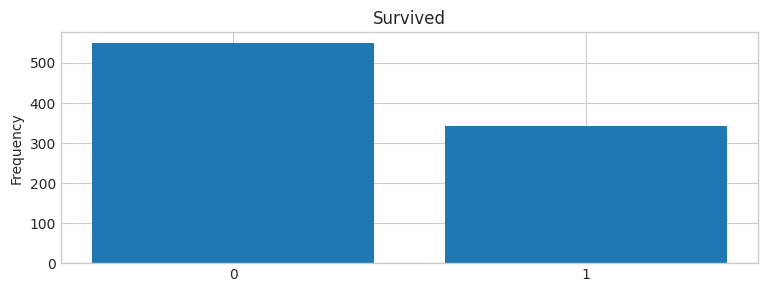

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


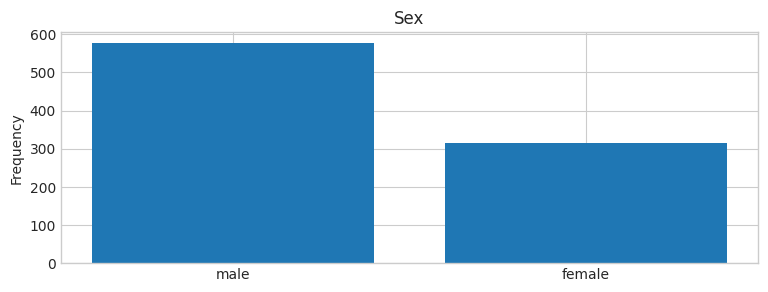

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


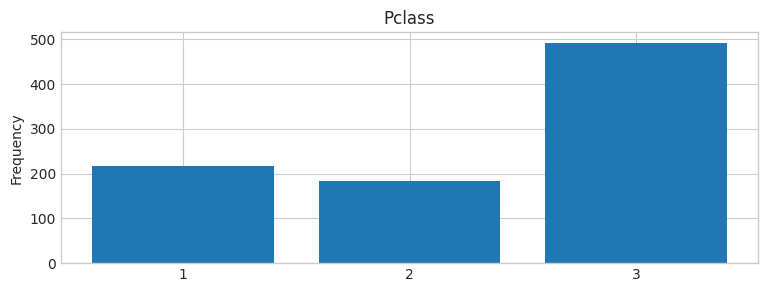

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


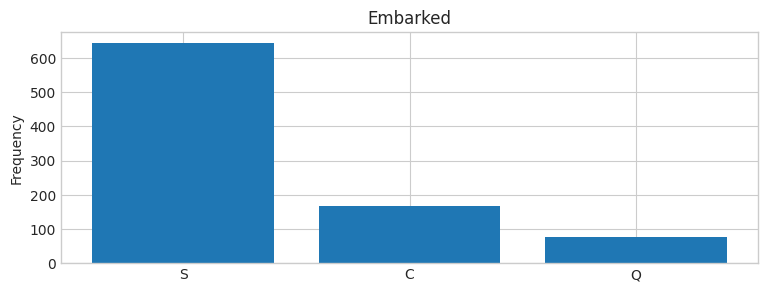

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


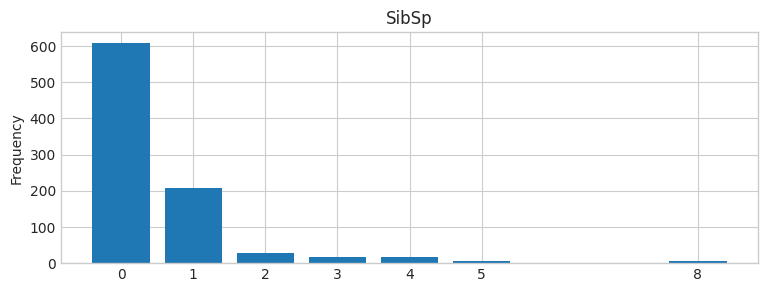

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


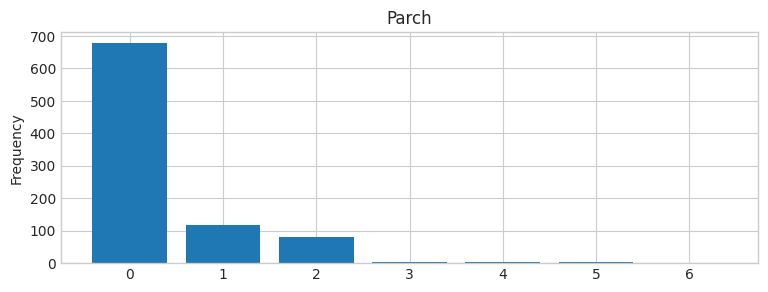

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [12]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

<a id= "5"><a/><br>
# Numerical Variable

In [13]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()


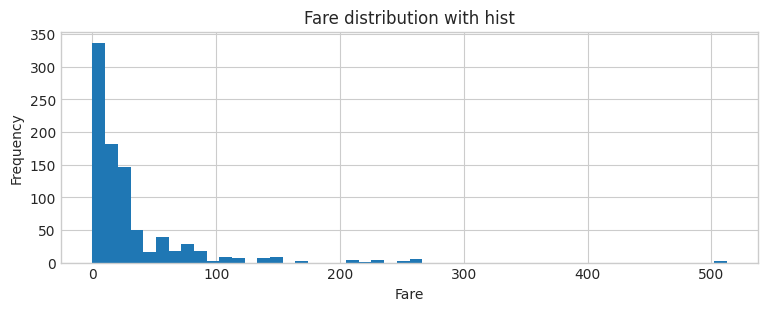

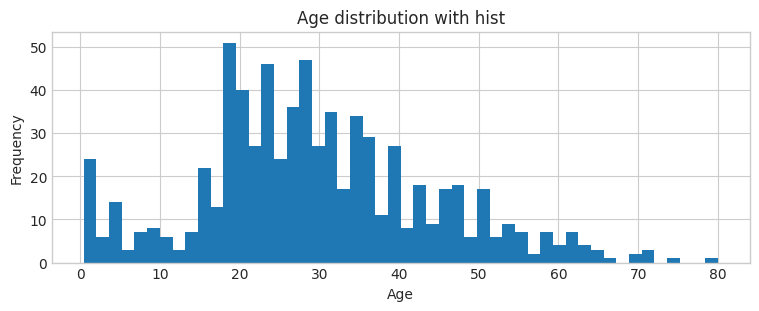

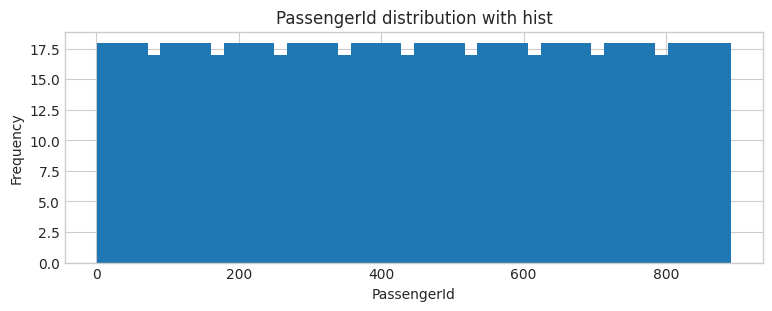

In [14]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id= "6"><a/><br>
  # **3-Basic Data Analysis**
*     Pclass - Survived
*     Sex - Survived
*     SibSp - Survived
*     Parch - Survived

In [15]:
# Plcass vs Survived
train_df[["Pclass","Survived","Age"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)


,Pclass,Survived,Age
0,1,0.629630,38.233441
1,2,0.472826,29.877630
2,3,0.242363,25.140620


In [16]:
# Sex vs Survived
#as_index -index numara verir
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id= "7"><a/><br>
# **4-Outlier Detection**

**"Aykırı değer"** 

In [19]:
def detect_outliers(df,features):
    outlier_indices=[]
    for  c in features:
        #1st Quartile "yüdeklik dilim" 
        Q1=np.percentile(df[c],25)
        #3st Quartile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1
        #Outlier step
        outlier_step=IQR *1.5
        #detect outlier and their indeces
        outlier_list_col=df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
     
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i, v in outlier_indices.items() if v>2)
    return multiple_outliers
    

In [20]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
#drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id= "8"><a/><br>
# **5-Missing Value**

* Find Missing Value
* Fill Missing Value

In [22]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id= "9"><a/><br>
# Find Missing Value

In [24]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [25]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id= "10"><a/><br>
# Fill Missing Value

* Embarked has 2 missing value
* Fare has only 1

In [26]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


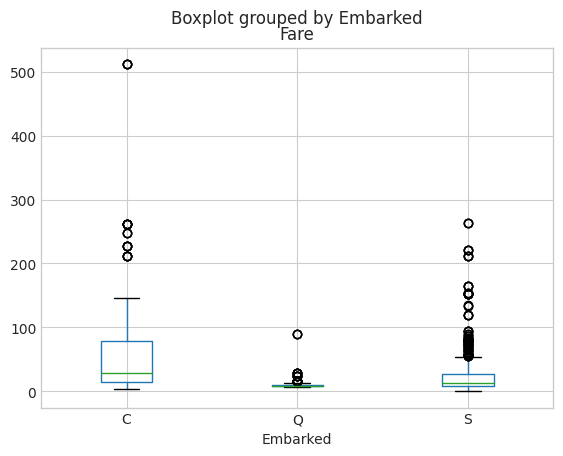

In [27]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [28]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
train_df[train_df["Pclass"] == 3]["Fare"]

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [31]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

<a id= "11"><a/><br>
 # **6-Visulization**

<a id= "12"><a/><br>
   ## **Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived**

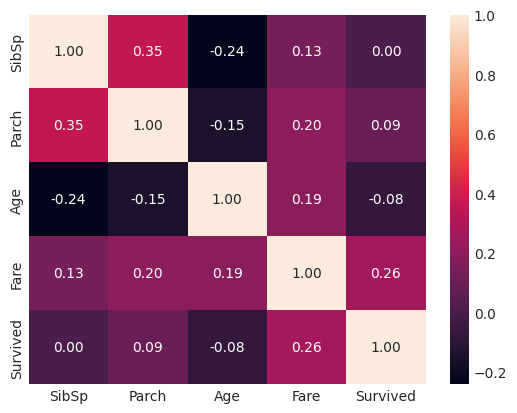

In [32]:
list1=["SibSp","Parch" ,"Age" , "Fare" ,"Survived"]
#correlation matrix -aralarındaki ilişki 
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

 <a id= "13"><a/><br> 
##     **SibSp -- Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


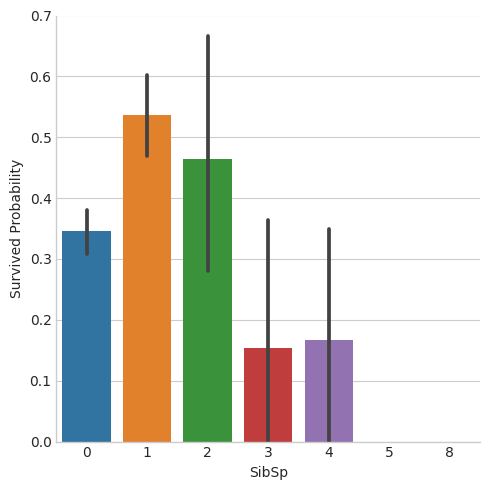

In [33]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df,
    kind="bar",height=5 )
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.

<a id= "14"><a/><br> 
## **Parch -- Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


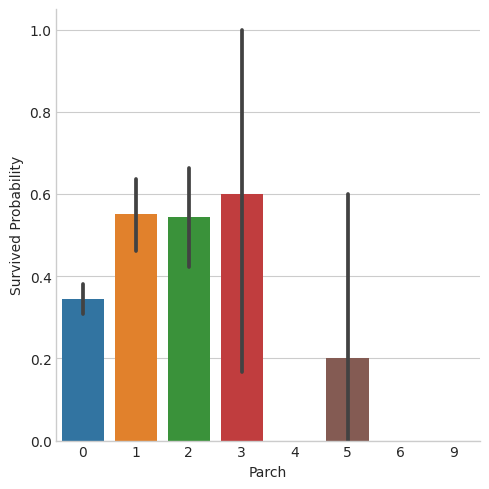

In [34]:
g = sns.catplot(x = "Parch", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

* Sibsp and parch can be used for new feature extraction with th = 3
* small familes have more chance to survive.
* there is a std in survival of passenger with parch = 3

<a id= "15"><a/><br> 
## **Pclass -- Survived**

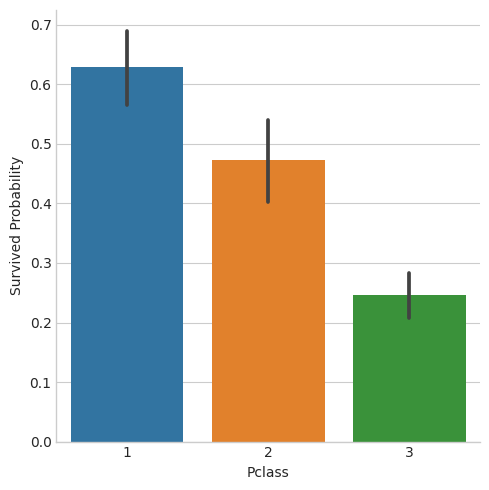

In [35]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

<a id= "16"><a/><br> 
## **Age -- Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


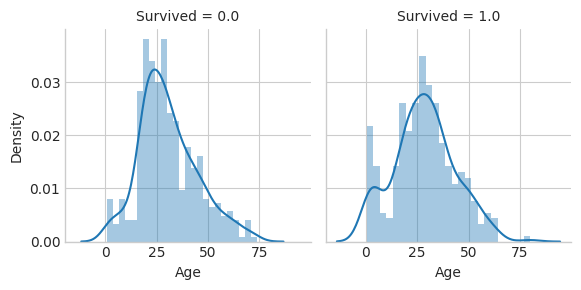

In [36]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id= "17"><a/><br>
    
## **Pclass -- Survived -- Age**

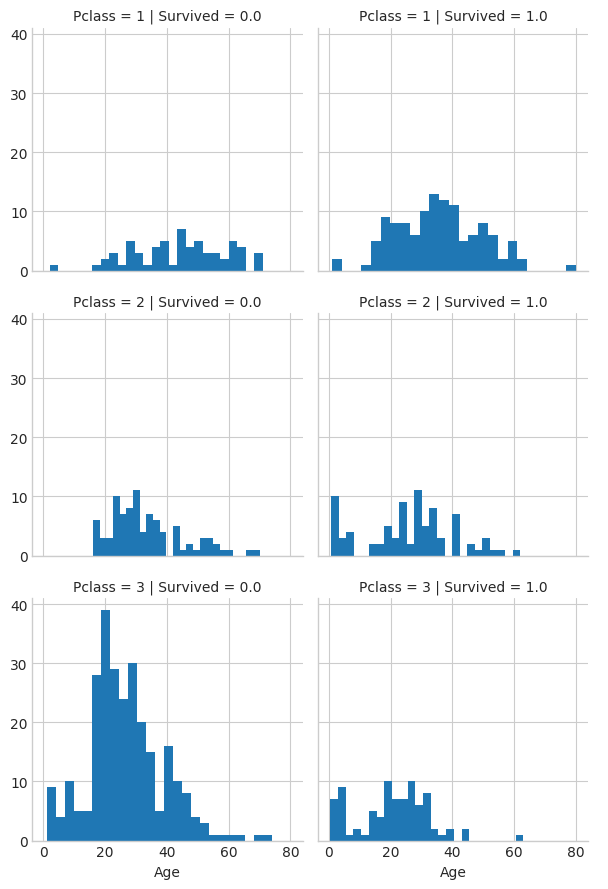

In [37]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", )
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* pclass is important feature for model training.

<a id= "18"><a/><br>
 ## **Embarked -- Sex -- Pclass -- Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


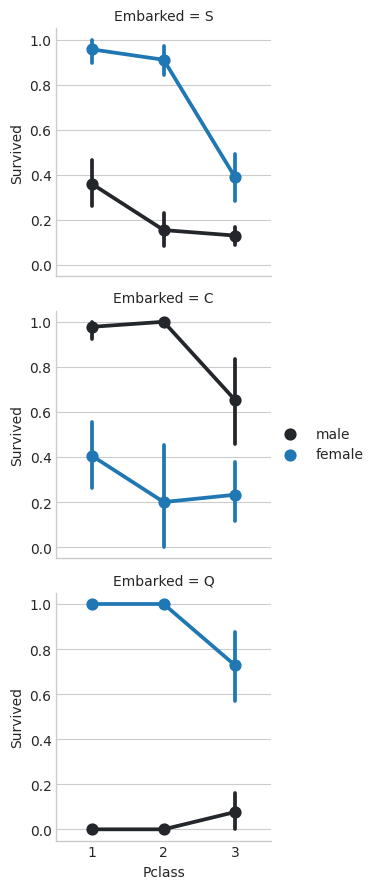

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

<a id= "19"><a/><br>
 ## **Embarked -- Sex -- Fare -- Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


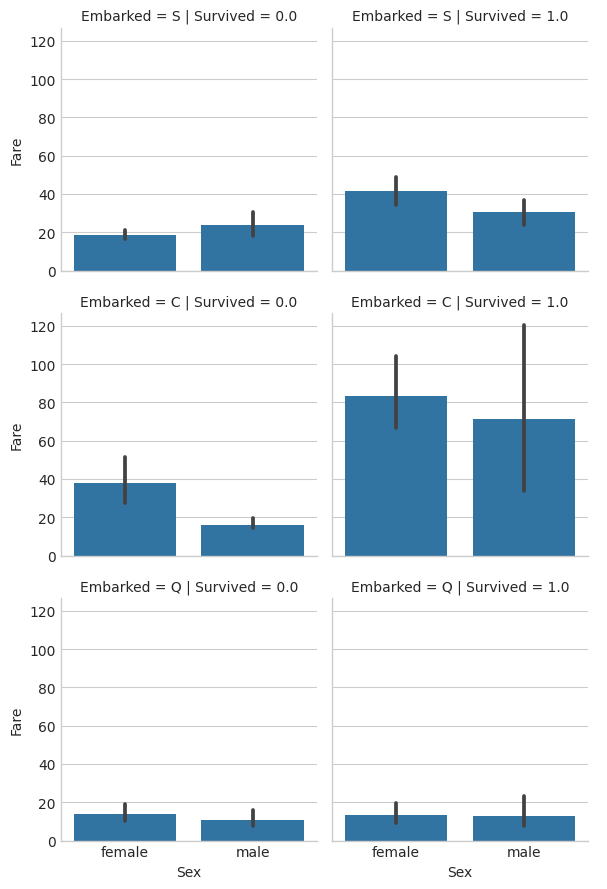

In [39]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id= "20"><a/><br>
 ## **Fill Missing: Age Feature**

In [40]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


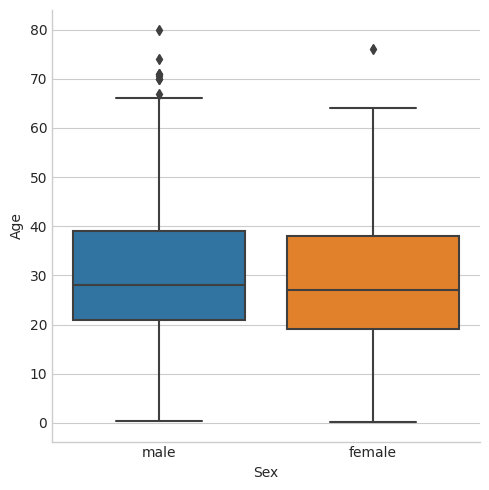

In [41]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

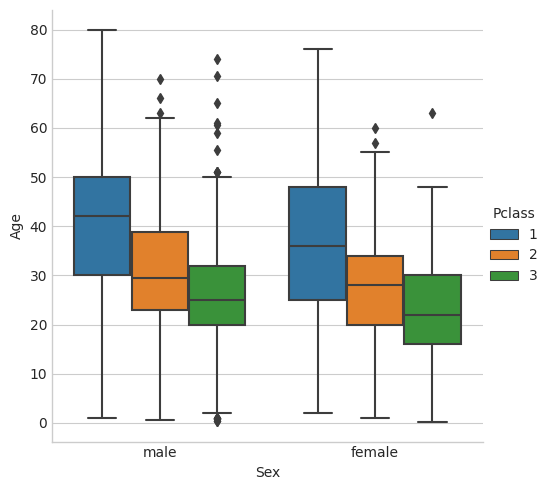

In [42]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

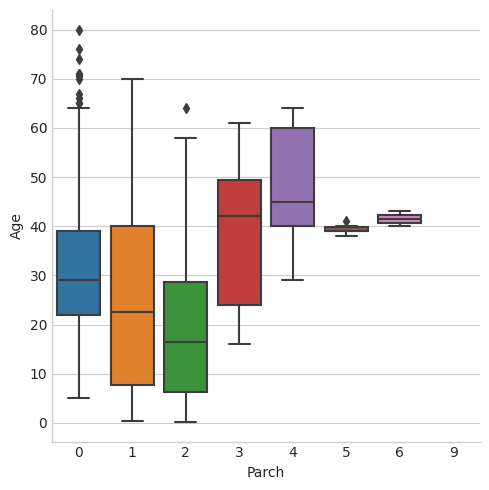

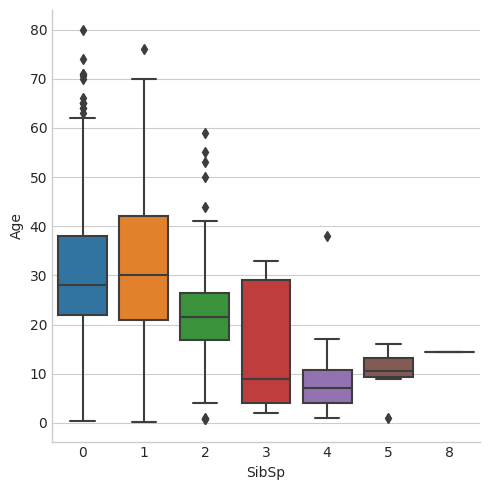

In [43]:
sns.catplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.catplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [44]:
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

In [45]:
#sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

<a id= ""><a/><br>
# **4- Feature Engineering**

## Drop Passenger ID and Cabin

In [46]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [47]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

<a id= ""><a/><br>
# **5-Modeling**

In [48]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression


<a id= "12"><a/><br>
# Train - Test Split

<a id= "13"><a/><br>
# Simple Logistic Regression